In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-06.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

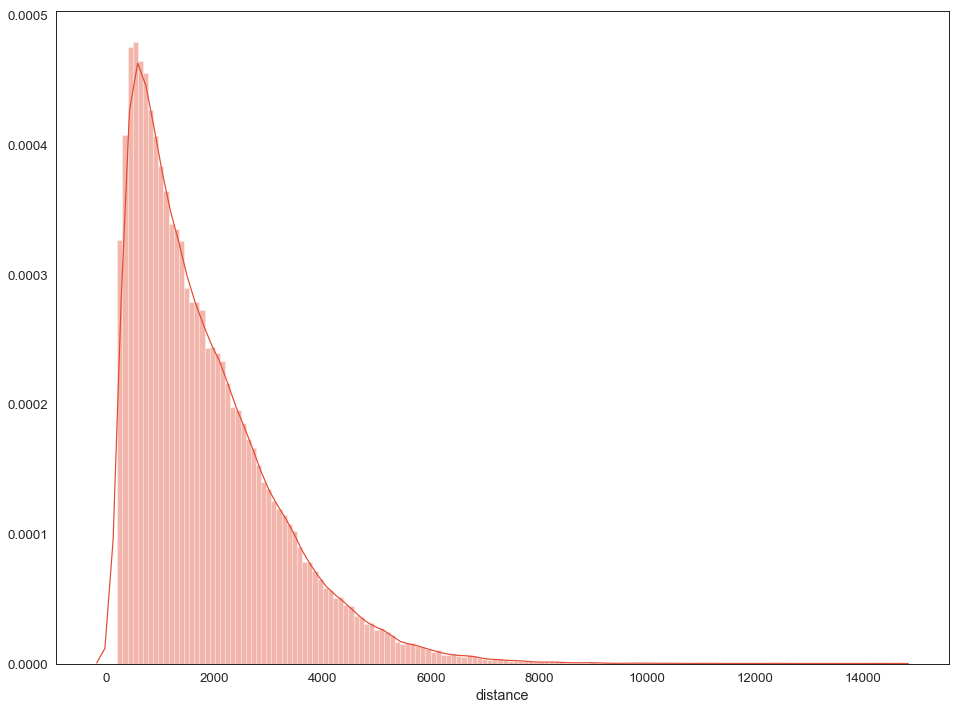

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,4157.506706,-3.783029e+06,inf,8.821647e-09
gamma,3723.525065,-3.725488e+06,inf,1.398363e-08
burr,3391.683188,-3.400794e+06,inf,1.880682e-07
norm,6499.059084,-3.262460e+06,inf,5.692274e-07
lognorm,3625.897322,-3.070463e+06,inf,2.646586e-06


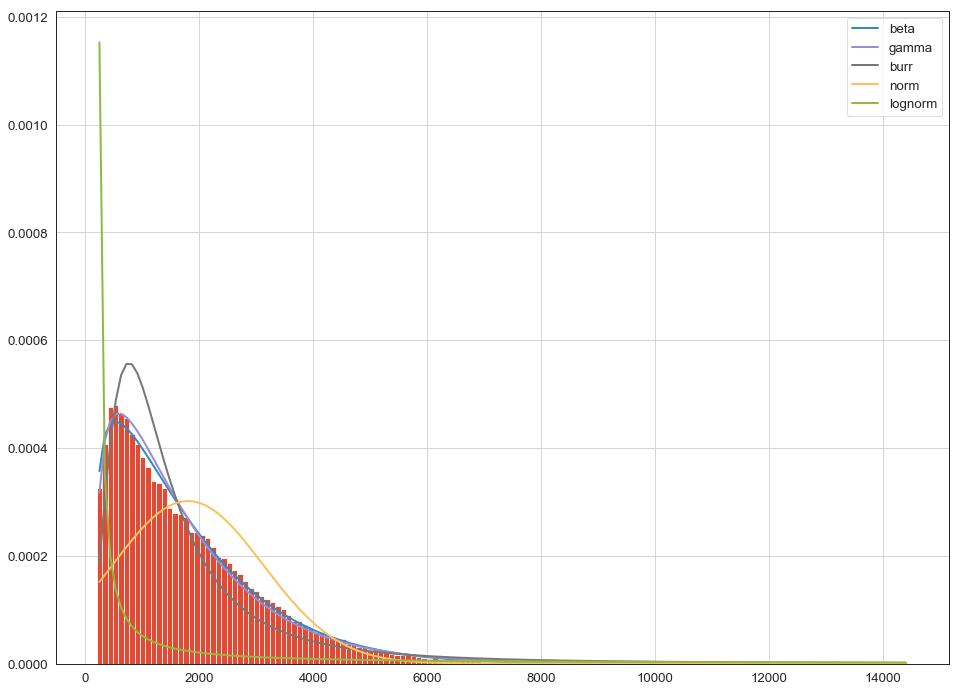

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.2113106450053053,
  11.6327415898399,
  199.49084513948657,
  16972.994210961744)}

In [8]:
f.get_best(method = 'aic')

{'burr': (1.8837066023817197,
  1.601388437730574,
  -2.7679358914240115,
  928.073403655578)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.2113106450053053,
  11.6327415898399,
  199.49084513948657,
  16972.994210961744)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,4157.506706,-3.783029e+06,inf,8.821647e-09
burr,3391.683188,-3.400794e+06,inf,1.880682e-07
alpha,3297.515124,-3.272352e+06,inf,5.258452e-07
norm,6499.059084,-3.262460e+06,inf,5.692274e-07
bradford,3001.909706,-3.262404e+06,inf,5.694286e-07


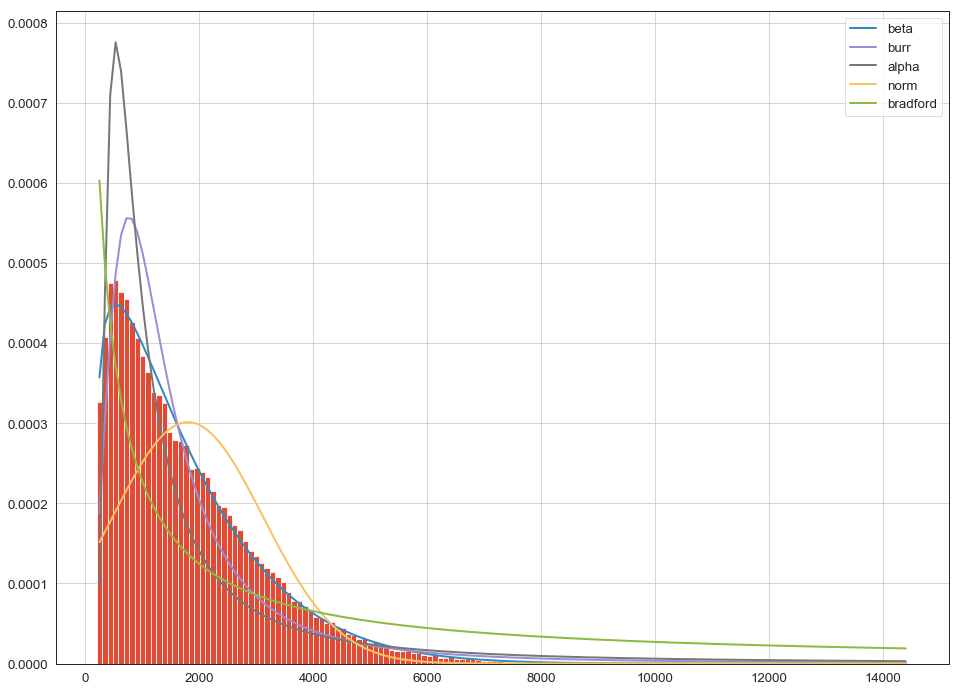

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,4616.385431,-3.562950e+06,inf,5.136333e-08
expon,3552.722041,-3.442041e+06,inf,1.352097e-07
dgamma,4384.930198,-3.287104e+06,inf,4.672790e-07
cosine,3117.929106,-3.111063e+06,inf,1.912450e-06
chi2,3192.601048,-3.075375e+06,inf,2.544546e-06


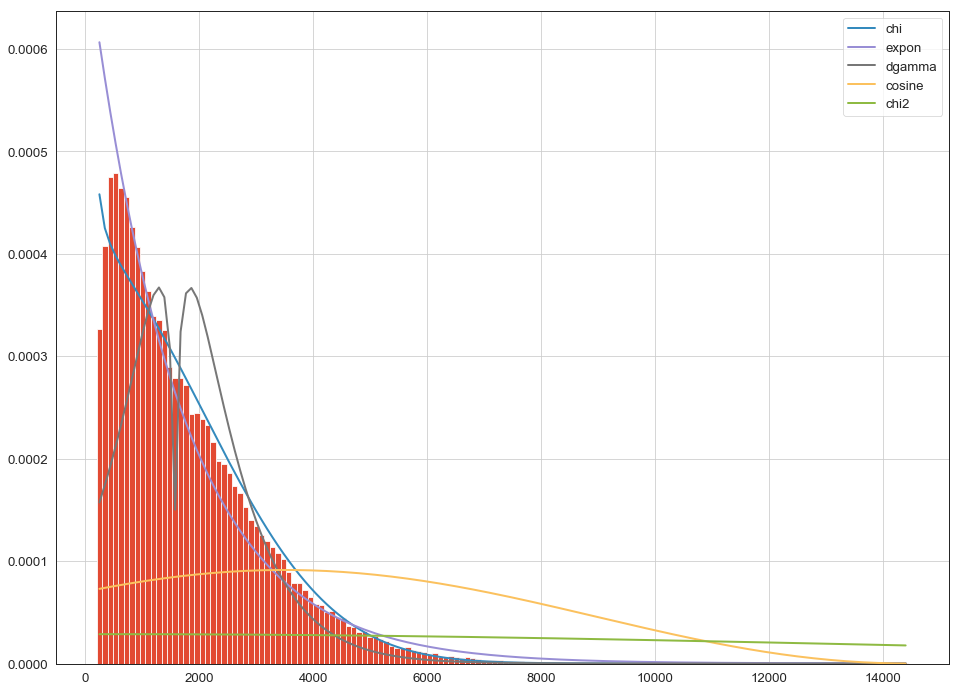

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3723.525065,-3.725488e+06,inf,1.398363e-08
exponnorm,3589.716361,-3.536552e+06,inf,6.344810e-08
fatiguelife,3605.480174,-3.527164e+06,inf,6.839959e-08
f,3694.612642,-3.501289e+06,inf,8.413270e-08
fisk,3380.944113,-3.436314e+06,inf,1.415392e-07


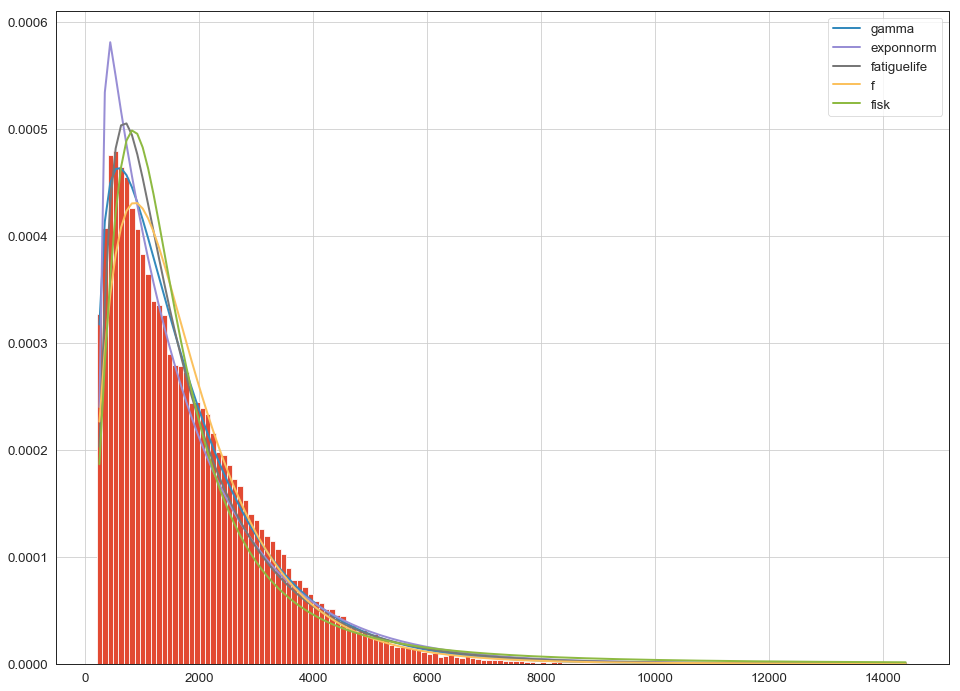

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gengamma,3529.907326,-3.448197e+06,inf,1.286853e-07
genexpon,3559.332085,-3.441227e+06,inf,1.360553e-07
levy,3205.828982,-3.287707e+06,inf,4.650727e-07
loggamma,6452.102336,-3.261199e+06,inf,5.749515e-07
lognorm,3625.897322,-3.070463e+06,inf,2.646586e-06


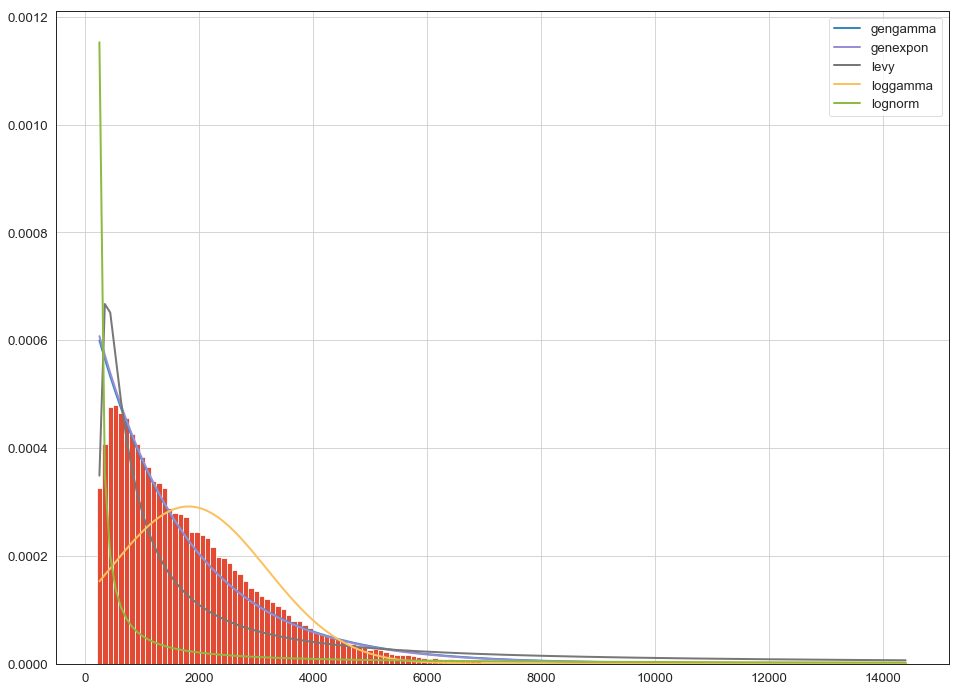

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3723.525050,-3.725488e+06,inf,1.398363e-08
t,4001.977713,-3.281865e+06,inf,4.872913e-07
logistic,4469.517381,-3.279638e+06,inf,4.961011e-07
powerlaw,2987.603897,-3.159123e+06,inf,1.301596e-06
pareto,3315.094445,-3.029268e+06,inf,3.680371e-06


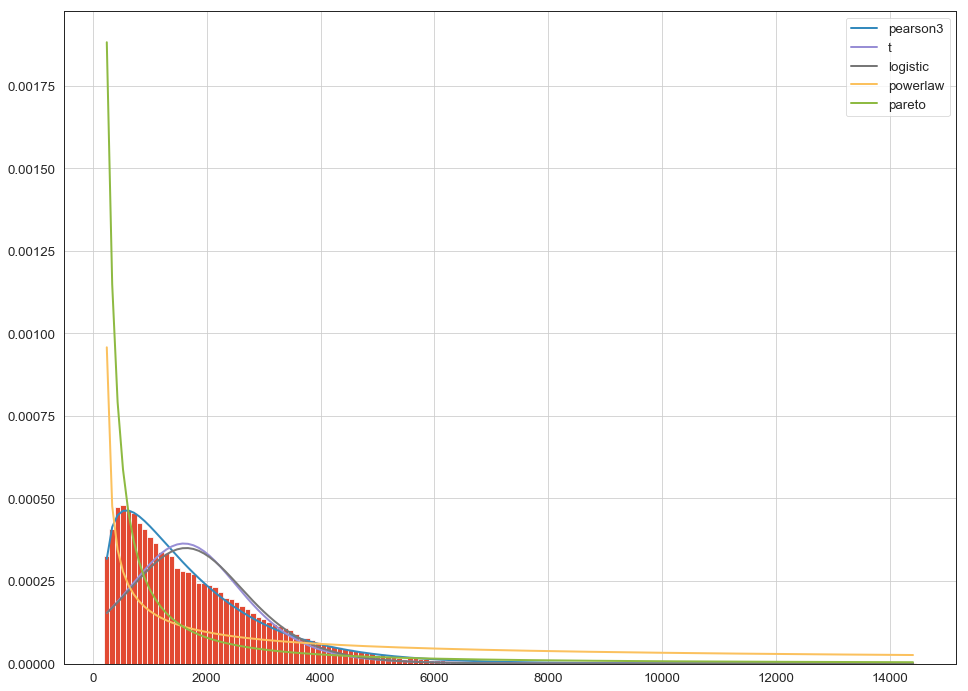

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,4157.506706,-3.783029e+06,inf,8.821647e-09
pearson3,3723.525050,-3.725488e+06,inf,1.398363e-08
gamma,3723.525065,-3.725488e+06,inf,1.398363e-08
chi,4616.385431,-3.562950e+06,inf,5.136333e-08
gengamma,3529.907326,-3.448197e+06,inf,1.286853e-07


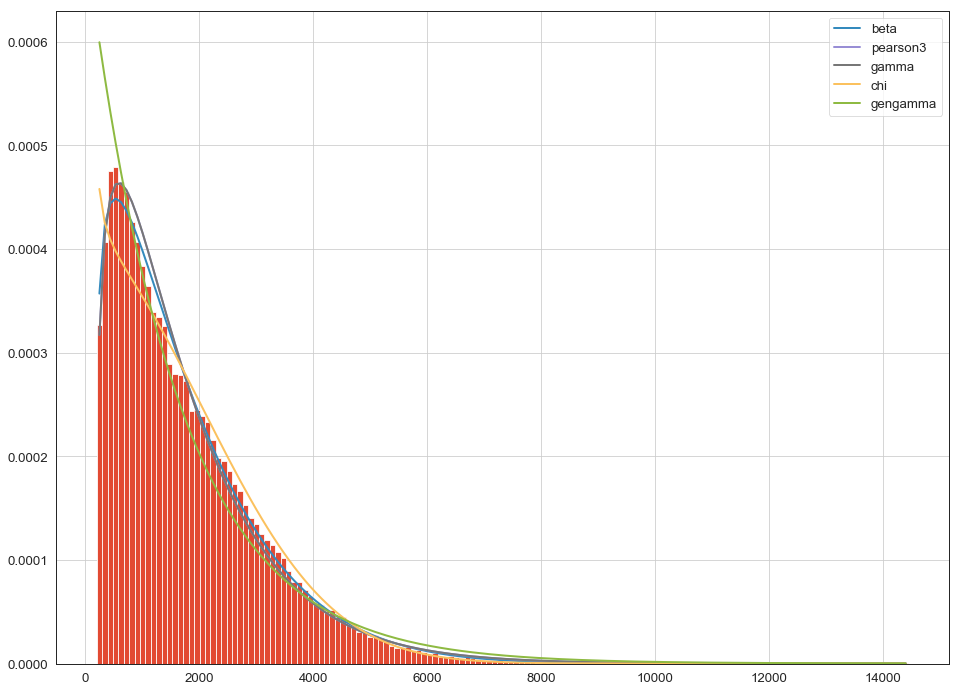

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

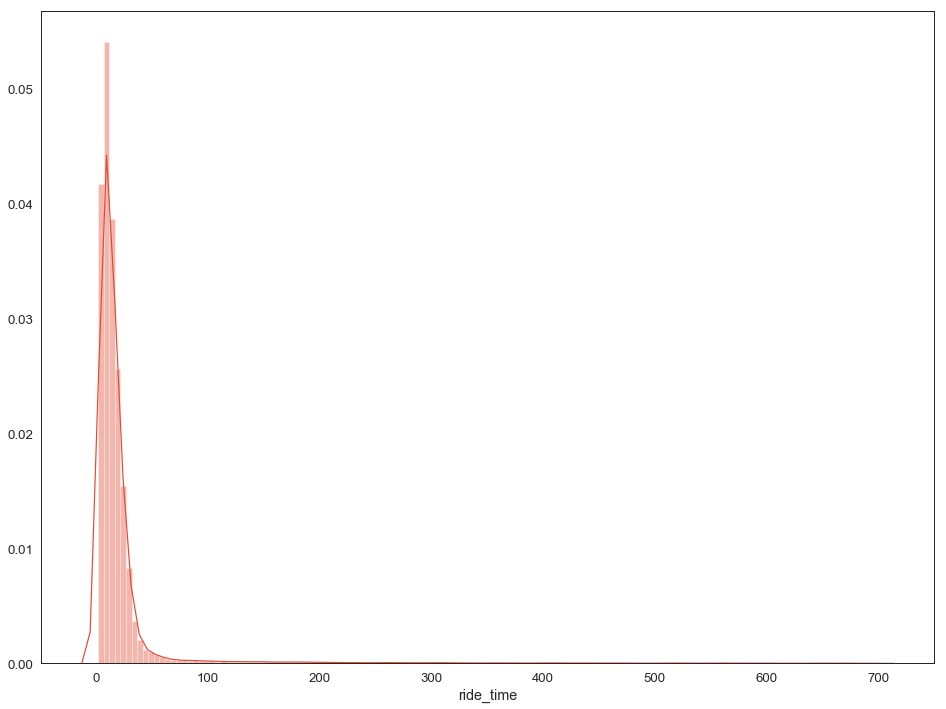

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,3009.258695,-2.501506e+06,0.040910,0.000251
lognorm,3432.870732,-2.404589e+06,0.074021,0.000546
gamma,6199.196721,-2.383803e+06,0.143713,0.000645
beta,5015.518142,-2.339273e+06,0.211945,0.000921
norm,9537.922056,-2.129182e+06,1.340010,0.004953


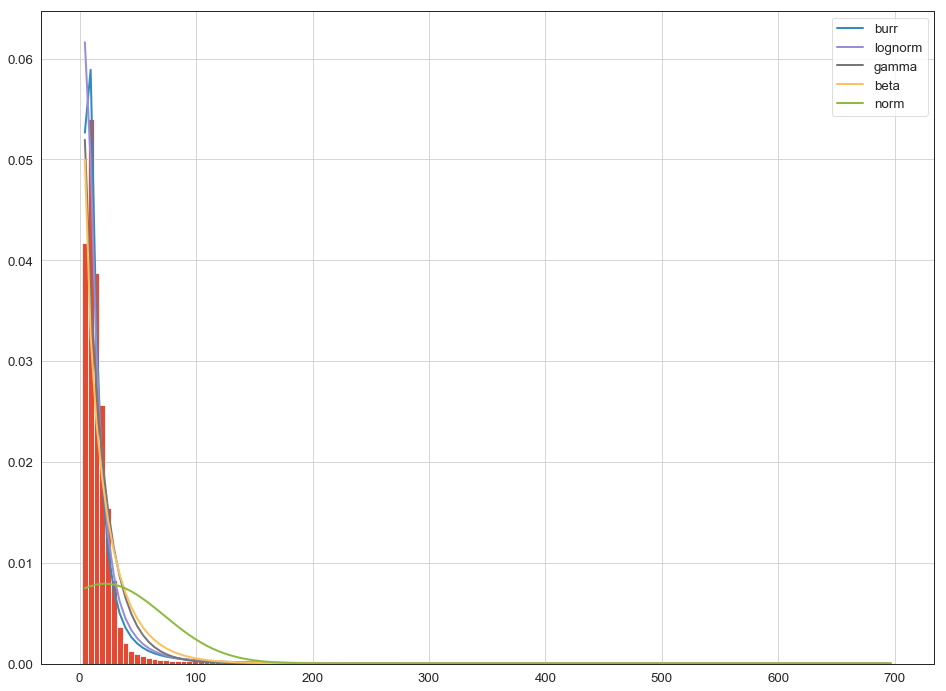

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.7151103973628188,
  3.979095343146631,
  -0.0615694762080678,
  4.3671963607884035)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.7151103973628188,
  3.979095343146631,
  -0.0615694762080678,
  4.3671963607884035)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.7151103973628188,
  3.979095343146631,
  -0.0615694762080678,
  4.3671963607884035)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
alpha,2921.611865,-2.546854e+06,0.027506,0.000175
burr,3009.258695,-2.501506e+06,0.040910,0.000251
beta,5015.518142,-2.339273e+06,0.211945,0.000921
norm,9537.922056,-2.129182e+06,1.340010,0.004953
bradford,1990.396680,-2.111311e+06,2.020330,0.005715


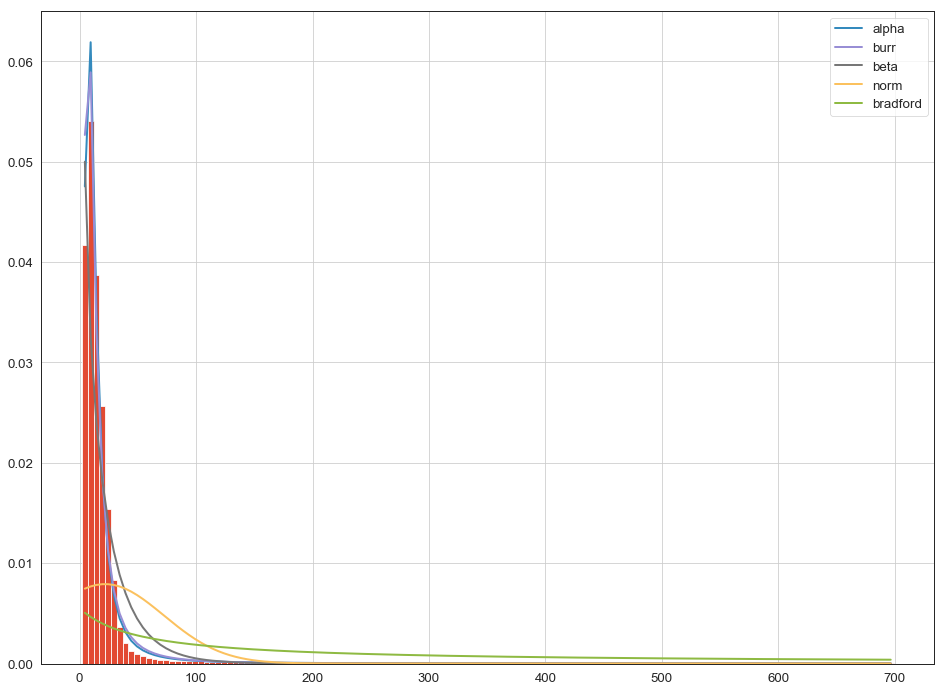

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,5768.200485,-2.375038e+06,0.194881,0.000692
dgamma,3882.340560,-2.265814e+06,0.186385,0.001659
chi2,2816.462537,-2.243937e+06,0.519687,0.001977
chi,4630.136629,-2.223893e+06,0.653527,0.002321
cosine,2110.619826,-2.091375e+06,2.687555,0.006704


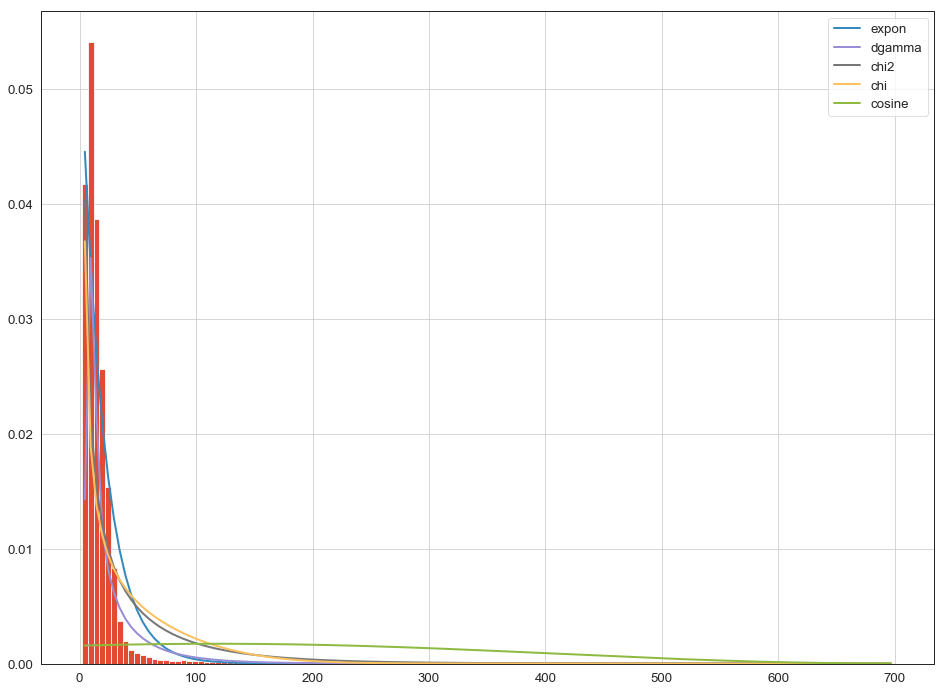

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fisk,3095.585413,-2.532800e+06,0.035249,0.000196
f,3059.567730,-2.456681e+06,0.049612,0.000360
exponnorm,5989.410748,-2.396930e+06,0.172769,0.000581
gamma,6199.196721,-2.383803e+06,0.143713,0.000645
fatiguelife,4244.117069,-2.345240e+06,0.172518,0.000879


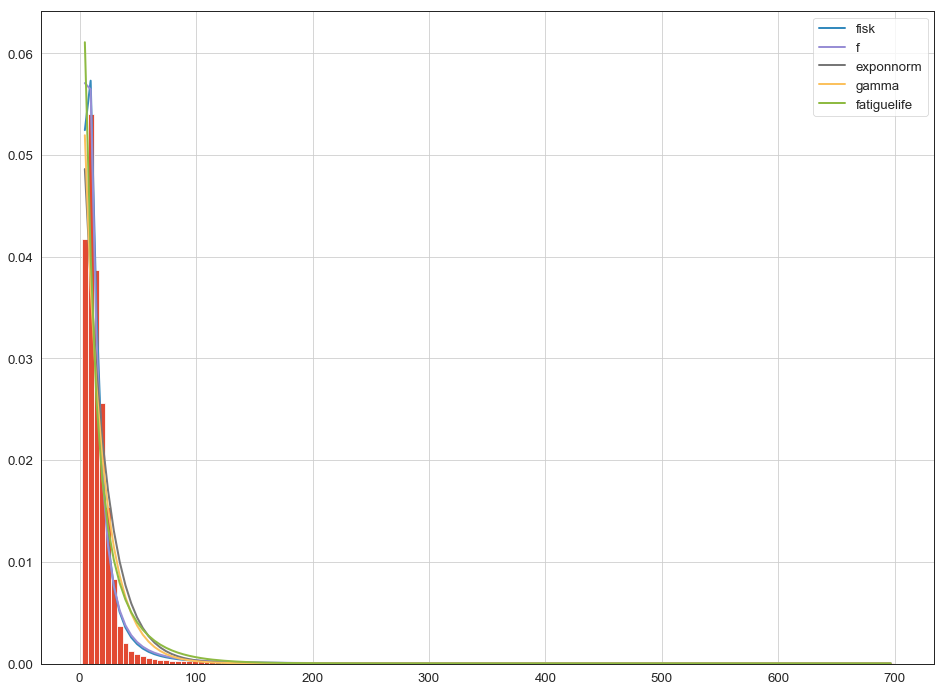

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,3432.870732,-2.404589e+06,0.074021,0.000546
gengamma,3771.371167,-2.394484e+06,0.090642,0.000592
genexpon,5774.235921,-2.375004e+06,0.194877,0.000692
levy,2340.521331,-2.242968e+06,0.310949,0.001992
loggamma,8193.818256,-2.124096e+06,1.436187,0.005159


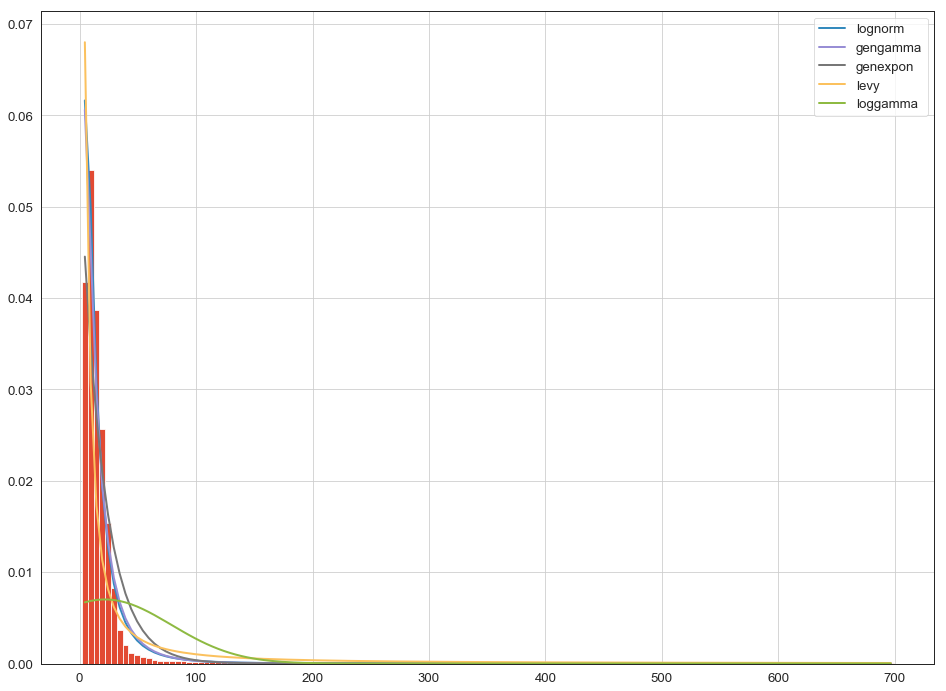

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,3262.387297,-2.437611e+06,0.050532,0.000419
pearson3,6123.504684,-2.377248e+06,0.144230,0.000680
pareto,2784.700354,-2.308206e+06,0.150043,0.001182
logistic,9301.784984,-2.242522e+06,0.282184,0.001999
powerlaw,2080.711269,-2.158282e+06,1.224168,0.003924


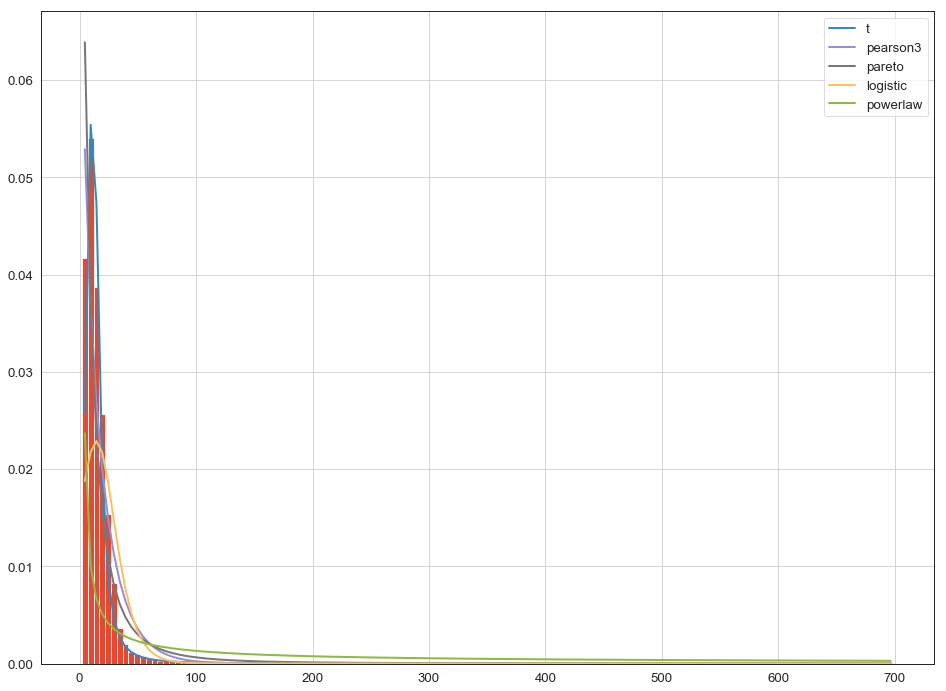

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
alpha,2921.611865,-2.546854e+06,0.027506,0.000175
burr,3009.258695,-2.501506e+06,0.040910,0.000251
f,3059.567730,-2.456681e+06,0.049612,0.000360
lognorm,3432.870732,-2.404589e+06,0.074021,0.000546


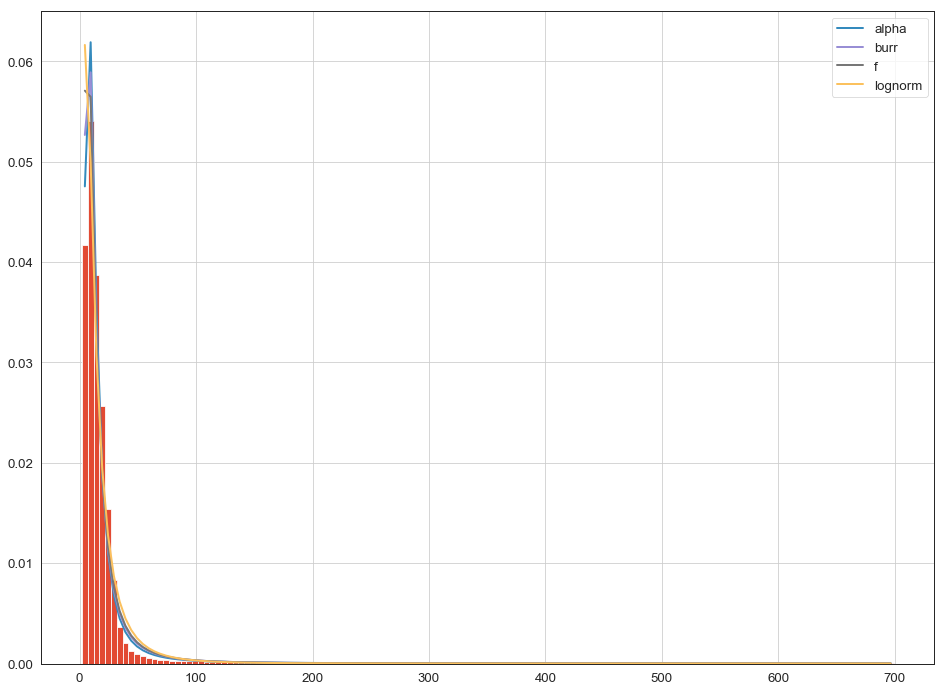

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','lognorm', 'f'], bins = 140)
f.fit()
f.summary()